In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:

# Load the dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_000)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,44.35,1514.50
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,51.24,1514.50
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,53.71,1514.51
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,65.12,1514.62


In [8]:
df = df.drop(['rsi14', 'sma14'], axis=1)
df

,time,open,high,low,close,price_high,price_low,price_close
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,True,True,True
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,True,True,False
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,True,True,False
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,True,True,False
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,True,True,False
...,...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,True,True,True
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,True,True,True
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,True,True,True
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,True,False,True


In [ ]:

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

In [9]:

# Create a label variable
df['price_high'] = (df['high'] > df['open'])
df['price_low'] = (df['low'] < df['open'])
df['price_close'] = (df['close'] > df['open'])
# df['price_increase'] = (df['close'] > df['open'])

# merge df with price_high,price_low, and  price_close, to data set
df

,time,open,high,low,close,price_high,price_low,price_close
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,True,True,True
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,True,True,False
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,True,True,False
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,True,True,False
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,True,True,False
...,...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,True,True,True
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,True,True,True
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,True,True,True
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,True,False,True


In [13]:

# Define the conditions for each possible combination
conditions = [
    (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 0),
    (df['price_high'] == 1) & (df['price_low'] == 0) & (df['price_close'] == 0),
    (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 0),
    (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 1),
    (df['price_high'] == 1) & (df['price_low'] == 1) & (df['price_close'] == 0),
    (df['price_high'] == 1) & (df['price_low'] == 0) & (df['price_close'] == 1),
    (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 1),
    (df['price_high'] == 1) & (df['price_low'] == 1) & (df['price_close'] == 1)
]

# Define the corresponding choices
choices = [0, 1, 2, 3, 4, 5, 6, 7]

# Apply the conditions to create the result column
df['status'] = np.select(conditions, choices, default=np.nan)
df

,time,open,high,low,close,price_high,price_low,price_close,status
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,True,True,True,7.0
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,True,True,False,4.0
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,True,True,False,4.0
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,True,True,False,4.0
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,True,True,False,4.0
...,...,...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,True,True,True,7.0
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,True,True,True,7.0
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,True,True,True,7.0
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,True,False,True,5.0


In [16]:
listColumn = list(df.columns)
listColumn.remove('time')
listColumn

['open',
 'high',
 'low',
 'close',
 'price_high',
 'price_low',
 'price_close',
 'status']

In [18]:


# Select relevant features for classification
features = listColumn
X = df[features]
y = df['status']

In [19]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:

# Initialize and train the Logistic Regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Confusion Matrix:
[[  86    0    0    0    0    0]
 [   0   35    0    0    0    0]
 [   0    0 1786    0    0    0]
 [   0    0    0 8210    0    0]
 [   0    0    0    0 2007    0]
 [   0    0    0    0    0 7876]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00      1786
         4.0       1.00      1.00      1.00      8210
         5.0       1.00      1.00      1.00      2007
         7.0       1.00      1.00      1.00      7876

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Accuracy Score:
1.0


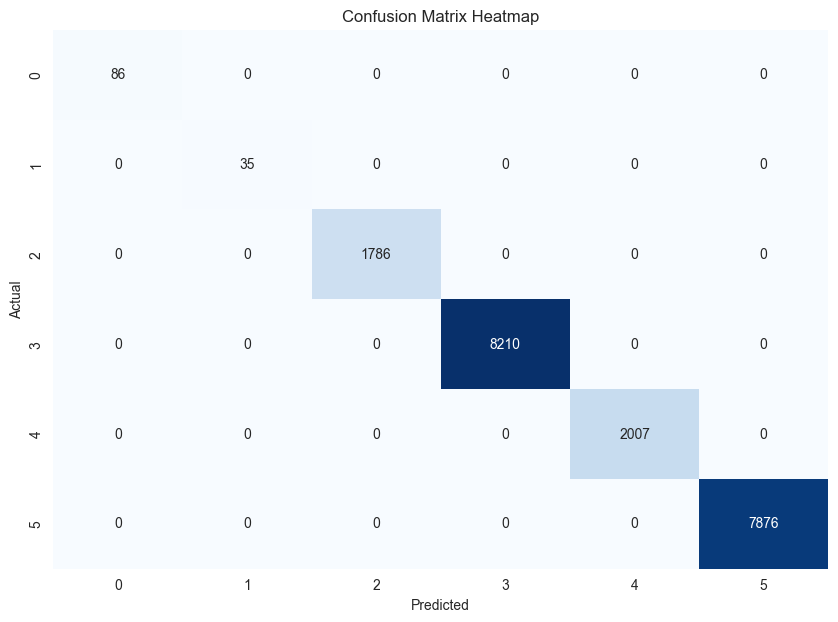

In [23]:

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [24]:

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

In [ ]:
from sklearn.svm import SVC

classifier = SVC(probability=True, random_state=42)
classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()